<a href="https://colab.research.google.com/github/spctr01/10DayMLChallenge/blob/master/day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [410]:
data = pd.read_csv('time_series_2019-ncov-Confirmed.csv')
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.4150,-61.3710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,12.1165,-61.6790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,-18.6657,35.5296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# 1. **Process the data:** On a particular date, If 70% number of confirmed case is zero, then Delete the column. 

In [412]:
#total column are 65 shown in above cell with dtypes
# 70%  confirmed cases will be 340 (487*70/100 = 340.09)

total = (data == 0 ).sum()    #get the toatal no of zeros in each column
col = [k for k,v in total.iteritems() if v >= 340]      # get all the columns with 0's more then 340

data.drop(col, axis = 1, inplace= True)
#after processing total columns remain is 23
data.shape

(487, 23)

# Plotting the Graph
### 1. Country Wise
#### last date column can be taken as total no of cases

In [413]:
# one country name can be multiple time so group the rows by country and sum the values(get total no of cases by country)
a = data.groupby(data['Country/Region']).sum()

# Lat and Long is also not required so droping them also

a.drop(['Lat','Long'], axis = 1, inplace = True)
a


,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40
Albania,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89
Algeria,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201
Andorra,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,1,6,10,15,23,33,43,43
Venezuela,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36,42,42,70,70
Vietnam,16,16,16,18,30,30,31,38,39,47,53,56,61,66,75,85,91,94,113


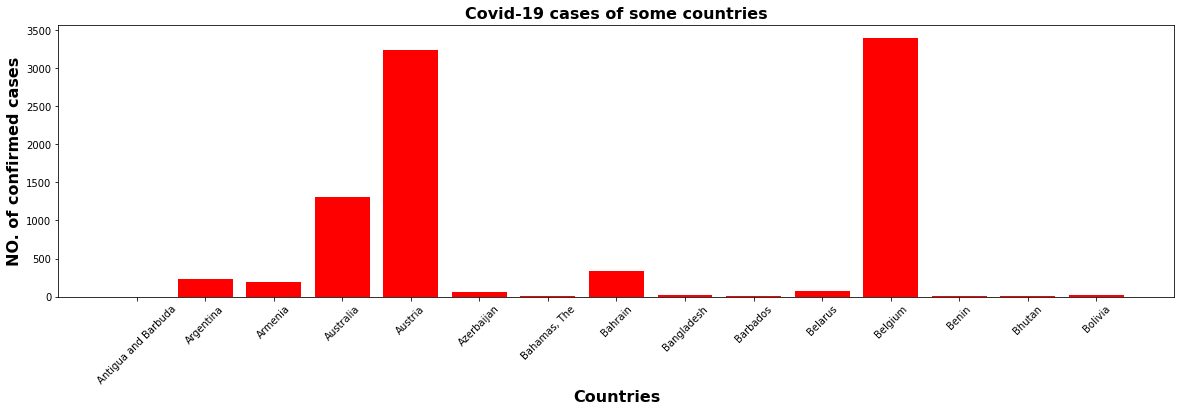

In [466]:
# Country is now index 

x = a.index[5:20]
y = a.iloc[5:20,-1]
plt.figure(figsize=(20,5))

plt.title('Covid-19 cases of some countries',fontsize=16, fontweight='bold')
plt.xlabel('Countries', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('NO. of confirmed cases', fontsize=16, fontweight='bold')

plt.bar(x, y, color ='red')
plt.show()



# 2. Plot date wise





In [415]:
a.loc['total'] = a.sum(axis=0)
a

,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40
Albania,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89
Algeria,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201
Andorra,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36,42,42,70,70
Vietnam,16,16,16,18,30,30,31,38,39,47,53,56,61,66,75,85,91,94,113
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3


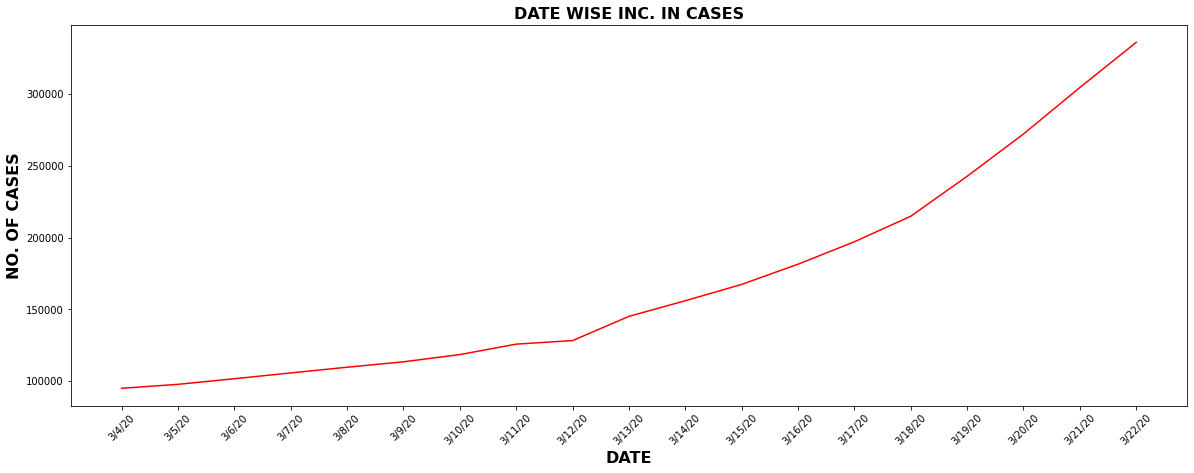

In [460]:
x = a.columns
y = a.loc['total']
plt.figure(figsize=(20,7))

plt.xlabel('DATE',fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('NO. OF CASES', fontsize=16, fontweight='bold')
plt.title('DATE WISE INC. IN CASES', fontsize=16, fontweight='bold' )

plt.plot(x,y, color = 'red')
plt.show()


#3. Plot continent wise

In [450]:

cont = pd.read_csv('continents.csv')
new = pd.merge(right= a, left= cont, right_on='Country/Region', left_on='Country')
new = new.groupby(['Continent']).sum()
new


,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Continent,,,,,,,,,,,,,,,,,,,
Africa,21,24,43,43,83,91,103,114,130,172,248,305,380,458,568,720,896,1064,1299
Asia,89744,91015,93054,94789,96001,96869,98060,99825,101117,102949,104840,106752,108310,110354,112356,114767,117003,119655,122657
Europe,4336,5736,7493,9637,12174,14960,18351,23373,24101,38165,46321,54661,65376,76437,89991,108143,128470,149774,168121
North America,188,260,320,465,599,681,1060,1426,1837,2454,3044,3897,5231,7154,8738,14874,20595,27543,35742
Oceania,55,58,64,68,81,96,112,133,133,205,256,305,385,464,588,710,832,1125,1383
South America,16,22,34,40,62,69,91,124,143,293,358,421,637,920,1155,1643,2259,2964,4096


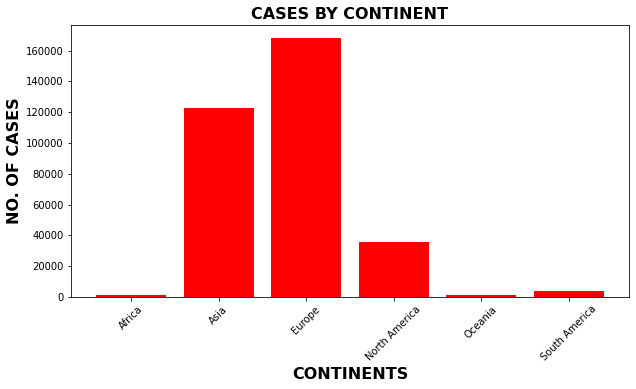

In [467]:
x = new.index
y = new.iloc[:,-1]
plt.figure(figsize=(10,5))

plt.title('CASES BY CONTINENT', fontsize=16, fontweight='bold')
plt.xlabel('CONTINENTS', fontsize=16, fontweight='bold')
plt.xticks(rotation= 45)
plt.ylabel('NO. OF CASES', fontsize = 16, fontweight = 'bold')

plt.bar(x,y, color = 'red')
plt.show()